<h1 align="center">Física Computacional.</h1>
<h1 align="center">Semestre 2025-2</h1>

<h2>Práctica 5. Métodos de diferenciación numérica </h2> 

---
### Alumno: Pérez Trejo Brandon Eliud
---

#### **1. Diferenciación numérica.** Crea una función $f(x)$ que devuelva $1+\frac{1}{2}\tanh{(2x)}$, luego usa **diferencias centrales** para calcular numéricamente la derivada de la función en el intervalo $-2\leq x\leq 2$.

#### Después, calcula la derivada analíticamente y haz una gráfica con tu resultado numérico y la respuesta analítica en el mismo gráfico. Puede resultar útil graficar la respuesta exacta como líneas y la numérica como puntos. (Hint: usa la función _tanh_ del paquete _math_)

In [1]:
# Importo las librerías y funciones que voy a usar 
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from matplotlib.pylab import imshow

In [2]:
# Defino la función que quiero derivar
def f1(x):
    return (1 + (1/2)*mt.tanh(2*x))

Text(0, 0.5, 'Eje y')

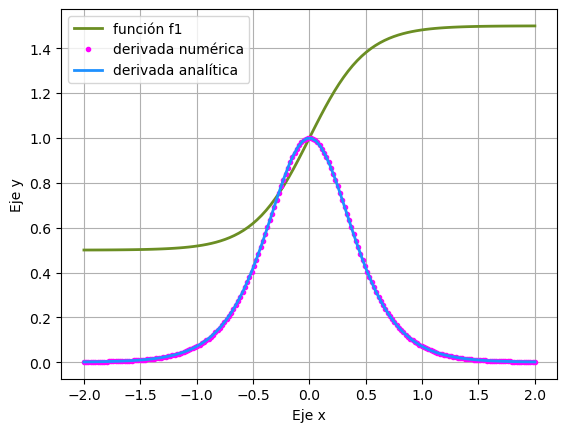

In [3]:
# La siguiente función toma una función, un intervalo y un elemento infinitesimal h, y regresa una lista con dos listas
# -estas dos listas corresponden al dominio e imagen de la función derivada.

def dcentral(f,a,b,h):
    intervalo = np.linspace(a,b,200)
    # Formalmente, la derivada de f en un punto x está dada por la siguiente función. Sin embargo, como quería hacer la gráfica -
    # -de la derivada, definí una función más grande que regresa puntos de la función derivada ("dcentral").
    def diferencial(x): 
        return (( f(x + (h/2)) - f(x - (h/2)) )/h )
    df = list(map(diferencial,intervalo)) # Definir "diferencial" dentro de "dcentral" permite usar map pues ya no depende de f y del punto x
    puntos = [intervalo,df] # Lo que quiero que me devuelva la función son los puntos del dominio y esos mismos puntos evaludados
                            # -algo similar a lo que hace la paquetería "np.polynomial.legendre.legauss"
    return puntos

# La derivada (o los puntos de la función derivada) los obtengo al aplicar la función anterior a f1(x)
derivada = dcentral(f1,-2,2,0.001)

#  Por otro lado, grafico también la función que estoy derivando. Para eso, defino una muestra de puntos x en el intervalo [-2,2]
dominio = np.linspace(-2,2,100)
codominio = list(map(f1,dominio))

# Con las dos últimas listas ya puedo graficar f1, y con la lista derivada, pues su derivada.
plt.plot(dominio,codominio, label='función f1',color='olivedrab',lw=2)
plt.plot(derivada[0],derivada[1],'.', label='derivada numérica', color='magenta')

# La derivada analítica de la función f1 es :
def real(x):
    return (1/(mt.cosh(2*x)**2))

# Grafico también la derivada analítica
plt.plot(dominio,list(map(real,dominio)),label='derivada analítica', color='dodgerblue',lw=2)

# POr último, agrego algunas cosas que estilicen la gráfica como nombres, etiquetas y un cuadrícula
plt.grid()
plt.xlabel('Eje x')
plt.legend()
plt.ylabel('Eje y')

#### **2. Campo eléctrico de una distribución de cargas.** Supongamos que tenemos una distribución de cargas y queremos calcular el campo eléctrico resultante. Una forma de hacerlo es calcular primero el potencial eléctrico $\phi$ y luego tomar su gradiante.

#### Para una carga puntual $q$ en el origen, el potencial eléctrico a una distancia $r$ del origen es $\phi = q/4\pi \epsilon _0 r$ y el campo eléctrico es $\vec{E}=-\nabla \phi$.

#### **(a)** Suponiendo que tienes dos cargas, de $+1\ C$ y $-1\ C$ (respectivamente), separadas $10\ cm$. Calcula el potencial eléctrico resultante en un plano cuadrado de $1\ m \times 1\ m$ que rodea las cargas y pasa a través de ellas. Calcula el potencial en puntos espaciados a $1\ cm$ en una cuadrícula y haz una visualización en la pantalla del potencial usando un gráfico de densidad.

In [4]:
# Primero defino mis constantes. En este caso, la cantidad de carga y la constante de permitividad en el espacio vacio
q0 = -1 # coulomb
q1 = 1 # coulomb
epsilon0 = 8.85e-12 # C^2/(Nm^2)

# Ahora, defino el potencial debido a la carga negativa, q0, como V0
# Si coloco mi origen en el centro entre las dos cargas, y la negativa en (-0.05,0), entonces el vector que va de la carga a un punto en- 
# -el espacio (x,y), este va a ser igual al vector que va del orgen a ese espacio menos el vector que va a la carga (-0.5,0)
# por lo tanto, r = (x-(-0.5),y). Así como se hizo con el potencial gravitacional en la tarea anterior
def V0(x,y):
    r = np.sqrt( ((x+0.05)**2) + (y**2) )
    return q0/(4*np.pi*epsilon0*r)

# Análogamente defino el potencial positivo debido a la carga q1
def V1(x,y):
    r = np.sqrt( ((x-0.05)**2) + (y**2) )
    return q1/(4*np.pi*epsilon0*r)

# Defino una división de la región en la que están mis cargas
ladox = np.linspace(-0.5,0.5,500)
ladoy = np.linspace(-0.5,0.5,500)

# Note que en la lista "ladox" no está el valor 0.05, de esta forma no se me indeterminará V1
for i in ladox:
    if i == 0.05:
        print("cuidado")

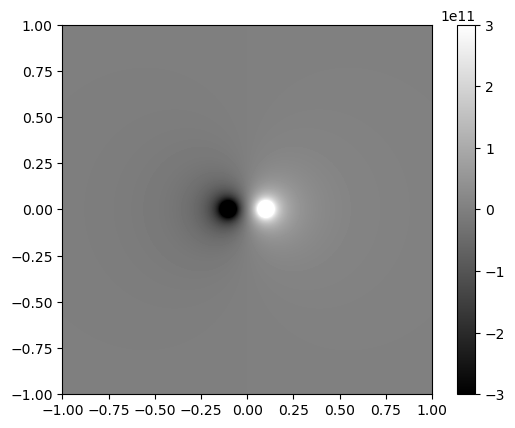

In [104]:
# Creo una rejilla con los posibles valores que pueden tomar x e y 
xv,yv = np.meshgrid(ladox,ladoy)

# Calculo el potencial debido a la carga negativa V0 y el debido a la carga positiva V1 en la región que delimité. 
# El potencial total es la suma de los potenciales por el principio de superposición 
potencial = V0(xv,yv) + V1(xv,yv)

# Con "imshow" hago una gráfica de densidad para las dos cargas y las acoto para que se aprecie mejor la diferencia entre ellas
imshow(potencial,extent=[-1,1,-1,1],cmap='gray', aspect='equal', vmin=-3e11,vmax=3e11)
plt.colorbar()
plt.show()

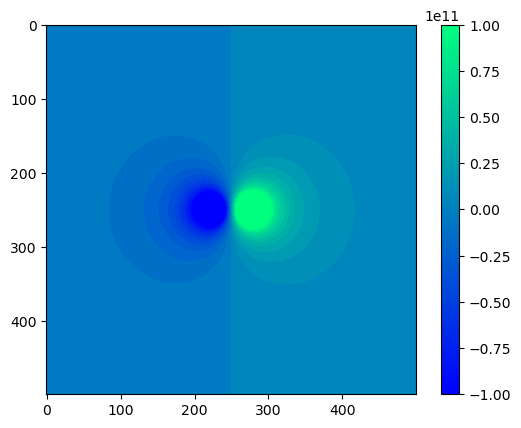

In [109]:
# Como extra, algo interesante en un potencial son las líneas equipotenciales. Matemáticamente estas son las curvas de nivel de la función
# creo dos arreglos que son los valores que tendrán las curvas de nivel
nivelA = np.linspace(-1e11,-1e9,25)
nivelB = np.linspace(1e9,1e11,25)

# La función contourf proporciona la siguiente visualización basada en las curvas de nivel
# Como nota, sumar dos arreglos de numpy lo que hace es juntar los elementos de ambos en una sola lista
plt.contourf(potencial,levels=nivelA+nivelB,cmap='winter')

# Grafico, además de las texturas que resaltan las curvas de nivel, la función de densidad anterior
# Note que las cotas del potencial coinciden con el mínimo y máximo valor de las curvas de nivel para que ambos gráficos coincidan
imshow(potencial,cmap='winter', vmin=-1e11,vmax=1e11)
plt.colorbar()

#### **(b)** Ahora calcula las derivadas parciales del potencial con respecto a $x$ e $y$, para encontrar el campo eléctrico en el plano $xy$ y realiza una visualización de dicho campo.

In [7]:
# Al igual que antes, defino una cuadrícula donde las funciones van a tomar su valores
# Esta cuadrícula posee muchos menos puntos pues lo que quiero representar son vectores
xu,yu = np.meshgrid(np.linspace(-0.5,0.5,30), np.linspace(-0.5,0.5,30))

# Me aseguro de que la cuadrícula hecha no admita el valor x donde esta la carga para que no se indetermine el potencial 
for i in xu[0]:
    if i == 0.05:
        print("cuidado")
    elif i == -0.05:
        print("cuidado")

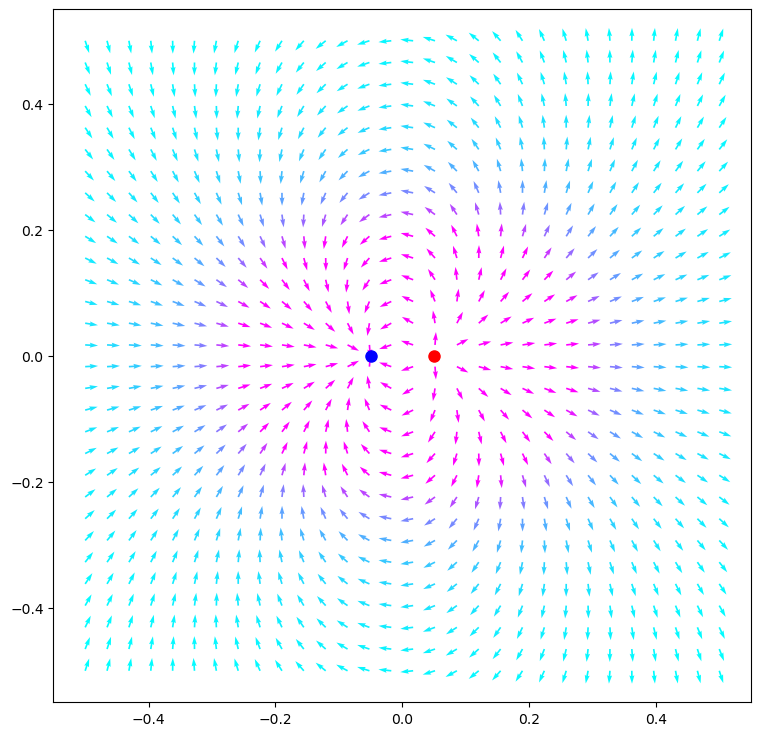

29760675044283.227

In [348]:
# defino las parciales como funciones que requiere: la función que se va a derivar, los puntos (x,y) sobre lo que se derivan
# -y, h que corresponde a la distancia entre puntos. 
def parcialx(f,x,y,h): 
    # La derivada corresponde a la misma fórmula de diferencias centrales, pero manteniendo a una de las variables fijas, en este caso: y
    return ( f(x + (h/2), y) - f(x - (h/2), y) )/h 

# De forma análoga se define la parcial respecto de "y", solo dejo a x fija
def parcialy(f,x,y,h): 
    return ( f(x, y + (h/2)) - f(x, y - (h/2)) )/h 

# Para no deriar dos veces y luego sumar, defino una función que me da el potencial en todo el espacio, esto es, la suma de los potenciales
# Esto es válido pues las ecuaciones están escritas desde un mismo sistema de referencia y se vale el principio de superposición.
def pot(x,y):
    return V0(x,y)+V1(x,y)

# Como el campo eléctrico es igual a "menos el gradiante del potencial", las entradas de este vector E = (u,v), las escribo con signos negativos
u = -parcialx(pot,xu,yu,0.001)
v = -parcialy(pot,xu,yu,0.001)

# Para graficar de una mejor manera, normalizo los vectores dividiéndolos entre su norma "M"
M = np.sqrt((u**2)+v**2)
Du = u/M
Dv = v/M

# Como quiero en un mismo gráfico las cargas representadas por puntos y el campo eléctrico, uso el comando subplot
# Además, aumento el tamaño de la gráfia para que se aprecien mejor los vectores
fig,ax = plt.subplots(figsize=(9,9))

# Con el comando de matplotlib.pyplot, que es "quiver", grafico el punto de donde parte el vector (xu,yu) y a donde llega (Du,Dv), con norma 1
# Además, como parámetro estra incluyo el tamaño de los vectores M para poder pintarlos en base a su magnitud con el comando cmap
# También, uso Normalize para que el color que adquieran los vectores no esté basado solo entre el mínimo y máximo valor, sino en los dados
norm1 = plt.Normalize(vmin=np.min(M),vmax=1e11)
ax.quiver(xu,yu,Du,Dv,M,cmap='cool',norm=norm1)

# La carga azul es negativa (ob) y la cargaroja positiva (or)
ax.plot(-0.05,0,'ob',markersize=8)
ax.plot(0.05,0,'or',markersize=8)
plt.show()
np.max(M)


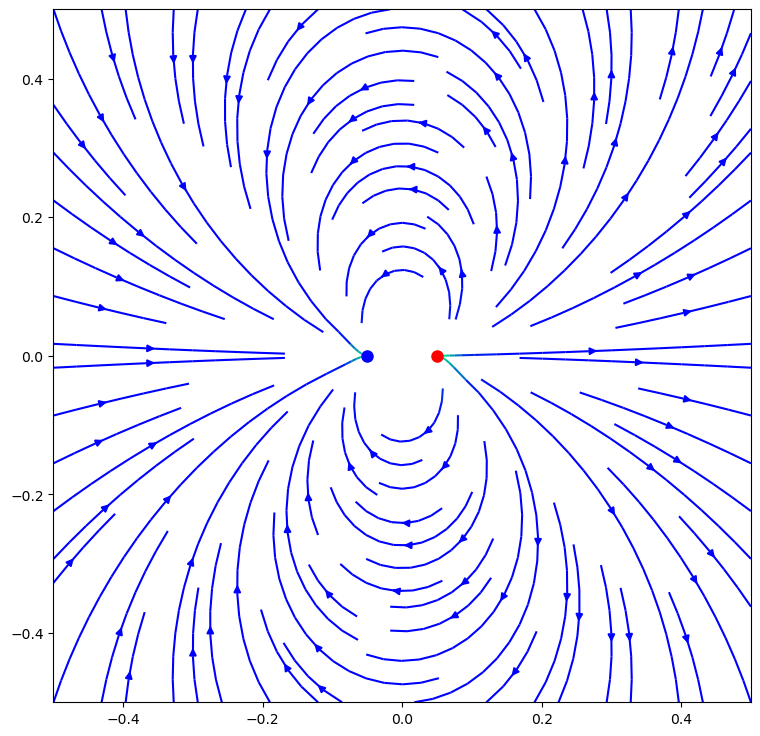

In [9]:
# También puedo graficar las líneas de campo con el comando streamplot
plt.figure(figsize=(9,9))
plt.streamplot(xu,yu,Du,Dv,color=M,cmap='winter')

plt.plot(-0.05,0,'ob',markersize=8)
plt.plot(0.05,0,'or',markersize=8)
plt.show()

#### **(c)** Ahora supongamos que tenemos una distribución continua de carg sobre un cuadrado de $L \times L$. La densidad de carga en $\frac{C}{m^2}$ es:

$$
    \sigma (x,y) = q_0 \sin{ \frac{2\pi x}{L} } \sin{ \frac{2\pi y}{L} }
$$

#### Calcula y visualiza el campo eléctrico resultante en puntos espaciados a $1\ cm$ en $1$ metro cuadrado del plano $xy$ para el caso donde $L=10\ cm$. La distribución de carga está centrada en el medio del área visualizada y $q_0 = 100\frac{C}{m^2}$.

#### Tendrás que realizar una integral doble sobre $x$ e $y$, luego diferenciar el potencial respecto a la posición para obtener el campo eléctrico. Elige cualquier método de integración que parezca apropiado para las integrales.

El potencial eléctrico de una distribución continua de carga está dada por una integral que depende de la densidad de carga; como en este caso la densidad de carga es superficial, el potencial se calcula mediante una integral doble.

Si se sitúa el cuadrado sobre los vértices (0,0), (0,10), (10,10) y (10,0), pues fuera de estos puntos la densidad es cero, entonces la integral doble integra desde cero hasta L la densidad como sigue:

$$
    \phi (x,y) = \int _0^L \int _0^L \frac{q_0 \sin{(\frac{2\pi x\prime}{L})} \sin{(\frac{2\pi y\prime}{L})} dx\prime dy\prime}
    {\sqrt{(x-x\prime)^2+(y-y\prime)^2}} 
$$

Text(0.5, 1.0, 'Distribución de carga en el cuadrado')

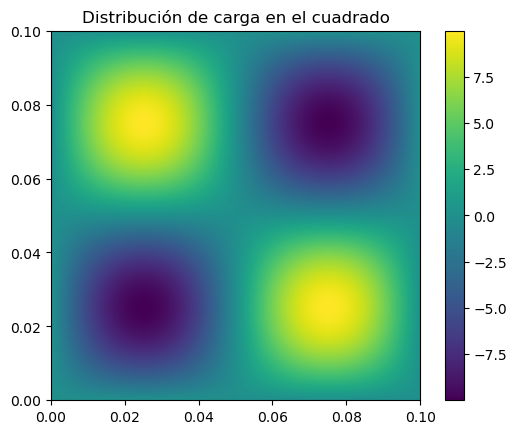

In [111]:
# Para calcular la integral doble, uso la doble cuadratura gaussiana que hice en la tarea anterior junto con sus comentarios

# Para definir una integral doble, ahora necesito dos intervalos [a,b] donde corre "x" y [c,d] donde corre "y"
def doblegauss(f,a,b,c,d):
    N=100 # Muestra de puntos
    legendre_x = np.polynomial.legendre.leggauss(N)[0] # De la paquetería de numpy extraigo puntos muestra
    legendre_w = np.polynomial.legendre.leggauss(N)[1] # y los pesos
    I = 0 # El valor de la integral comienza en cero
    
    for i in range(N): # Para un "i" fijo, hago correr la suma sobre los k, dados xi y wi
        x = ((0.5)*(b-a)*(legendre_x[i]) + (0.5)*(b+a)) 
        wx = (0.5)*(b-a)*(legendre_w[i]) 
        for k in range(N): # Aquí empieza a correr la suma sobre los k
            y = ((0.5)*(d-c)*(legendre_x[k]) + (0.5)*(d+c)) 
            wy = (0.5)*(d-c)*(legendre_w[k])
            # Como es una suma doble, este I va dentro del segundo for pues primero se suman las contribuciones en k, luego en i.
            I = I + wx*wy*f(x,y) 
    return I

# Para definir el potencial eléctrico debido a la placa, defino primeramente las constantes
q03 = 10
L = 0.1

# Después, defino la función potencial que depende de x e y
def potencial3(x,y): # Como esta función está definida en base a una integral doble, defino aquí dentro la función a integrar 
    def Fintegrada(u,v):
        return ( q03*np.sin(2*(np.pi)*u / L)*np.sin(2*(np.pi)*v / L) )/( np.sqrt( (x-u)**2 + (y-v)**2 ) )
    return (1/4*np.pi*epsilon0)*doblegauss(Fintegrada,0,L,0,L) # Como salida

# Antes de calcular y graficar el potencial formalmente, defino la función de densidad para ver cómo es la distribución
def densidad(x,y):
    return q03*(np.sin(2*(np.pi)*x / L))*(np.sin(2*(np.pi)*y / L))

# Defino también una cuadrilla de [0,L]x[0,L] para graficar la densidad
xc,yc=np.meshgrid(np.linspace(0,L,400),np.linspace(0,L,400))

# Defino la variable carga que corresponde a la gráfica de densidad sobre el cuadrado [0,L]^2
carga = densidad(xc,yc)
imshow(carga,extent=[0,L,0,L],cmap='viridis')
plt.colorbar()
plt.title('Distribución de carga en el cuadrado')

In [115]:
# Defino la región del espacio donde voy a calcular el potencial eléctrico, esto es, en una región cuadrada de 1 metro
xp,yp=np.meshgrid(np.linspace(-0.4,0.5,400),np.linspace(-0.4,0.5,400))

# Como la función del potencial es demasiado compleja de calcular, lo hago una sola vez y la guardo en una variable
p3 = potencial3(xp,yp)

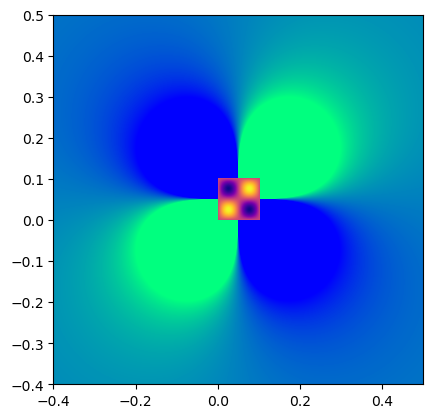

In [322]:
# Para colocar dos gráficas en una sola utilizo el comando subplots
fig3, ax3 = plt.subplots()

# Después, agrego con "ax3." las gráficas que quiero juntar. En este caso el potencial eléctrico: winter
ax3.imshow(p3,extent=[-0.4,0.5,-0.4,0.5],origin='lower',cmap='winter',vmin=-1e-14,vmax=1e-14)
# Y la densidad de carga: plasma, en sus respectivos dominios indicados por extent
ax3.imshow(carga, extent=[0,L,0,L], origin='lower',cmap='plasma',alpha=1.0)

# Al principio me estaba grafiando las dos gráficas del mismo tamaño, pero me dijo chatgpt que para evitar eso indicara los ejes reales
ax3.set_xlim(-0.4,0.5)
ax3.set_ylim(-0.4,0.5)
plt.show()

In [315]:
# AL igual que antes, el campo eléctrico lo puedo obtener derivando el potencial directamente. 
# Como lo que quiero es representar un campo vectorial, esta vez usaré una malla más pequeña

xc,yc = np.meshgrid(np.linspace(-0.4,0.5,35),np.linspace(-0.4,0.5,35))

# Calculo las derivadas parciales de la función potencial y las multiplico por -1 para obtener el campo eléctrico
Ex = -parcialx(potencial3,xc,yc,0.001)
Ey = -parcialy(potencial3,xc,yc,0.001)

# Calculo la norma de cada vector del campo eléctrico para normalizarlos en la gráfica, pero distinguiéndolos por el color
M3 = np.sqrt(Ex**2 + Ey**2)

# Aquí están los vectores normalizados. Guardo estas variables y continuo en otra celda porque este calcul tarda un poquito
Dex = Ex/M3
Dey = Ey/M3

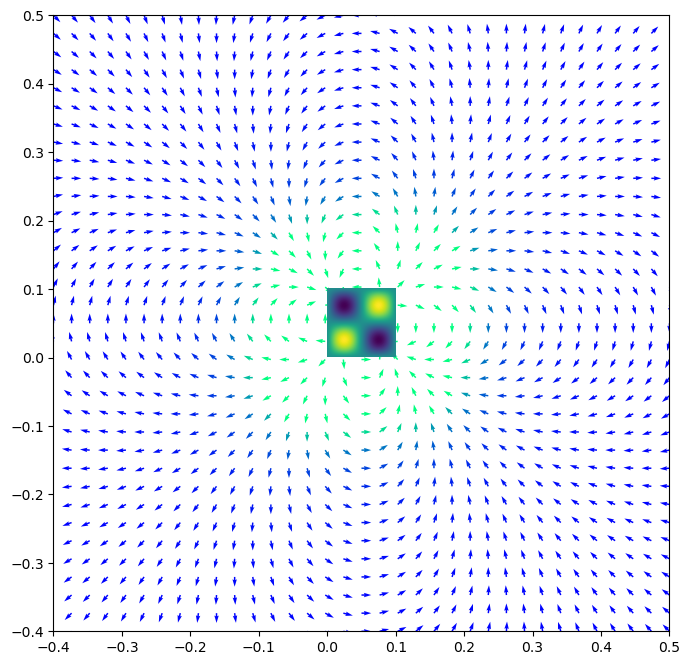

In [317]:
# COmo voy a graficar dos gráficas, nuevamente me conviene hacerlo de la siguiente manera
fig, ax4 = plt.subplots(figsize=(8,8))

# Necesito que los vectores tengan color en base a su magnitud, sin embargo, cerca de la placa los vectores son muy grandes y el resto no se diferencia
# -así que establezco un límite en la magnitud de los vectores para que adquieran color
norm = plt.Normalize(vmin=np.min(M3),vmax=1e-12)

# Defino mis dos gráficas: el campo vectorial y
ax4.quiver(xc,yc,Dex,Dey,M3,cmap='winter',norm=norm)
# El cuadrito de densidad como antes
ax4.imshow(carga, extent=[0,L,0,L], origin='lower',cmap='viridis',zorder=1)
# Como las flechas se colocaban encima del gráfico de densidad, utilicé el comando "zorder" para que las gráficas no se combinaran, sino que se encimaran

# Establezco límites reales para que las gráficas se grafiquen como debe ser
ax4.set_xlim(-0.4,0.5)
ax4.set_ylim(-0.4,0.5)
plt.show()

#### **3. Procesamiento de imágenes y SMT.**

In [314]:
imshow?

Signature:
imshow(
    X: 'ArrayLike | PIL.Image.Image',
    cmap: 'str | Colormap | None' = None,
    norm: 'str | Normalize | None' = None,
    *,
    aspect: "Literal['equal', 'auto'] | float | None" = None,
    interpolation: 'str | None' = None,
    alpha: 'float | ArrayLike | None' = None,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    origin: "Literal['upper', 'lower'] | None" = None,
    extent: 'tuple[float, float, float, float] | None' = None,
    interpolation_stage: "Literal['data', 'rgba'] | None" = None,
    filternorm: 'bool' = True,
    filterrad: 'float' = 4.0,
    resample: 'bool | None' = None,
    url: 'str | None' = None,
    data=None,
    **kwargs,
) -> 'AxesImage'
Docstring:
Display data as an image, i.e., on a 2D regular raster.

The input may either be actual RGB(A) data, or 2D scalar data, which
will be rendered as a pseudocolor image. For displaying a grayscale
image, set up the colormapping using the parameters
``cmap='gray', vmin=0, 

#### **(b)**

#### **(c)**